In [1]:
#Imports 
import numpy as np
import nltk
import gensim
import re
import matplotlib
from matplotlib import pyplot as plt
from gensim import downloader
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Download resources
word_vectors = gensim.downloader.load('glove-wiki-gigaword-300')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Read in movie script
path="C:\\Users\\Neil\\Downloads\\jurassicpark_dialog.txt"

with open(path) as file:
    text = file.read().replace('\n', ' ')

stops = set(stopwords.words('english'))
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
def displayList(list):
    for element in list:
        print(element+"\n")

In [5]:
def removeWords(text, words_to_remove):
    for word in words_to_remove:
        text=text.replace(word, "")
    return text

def lowerCase(text):
    return text.lower()
    
words_to_remove=["ELLIE", "GRANT", "HAMMOND", "TIM", "WU", "LEX", "NEDRY", "MULDOON", "GENNARO", "ARNOLD", "MICHAEL", "CRICHTON", "STUDENT", "REGIS", 
                 "MARIA", "SCOTCH", "MARMO", "ROSS", "BAKER"]
text=removeWords(text, words_to_remove)
text=lowerCase(text)


In [6]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stops]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def blockText(text, sentencesPerBlock):
    sentences=nltk.sent_tokenize(text)

    originalBlocks=[]

    for i in range(0, len(sentences), sentencesPerBlock):
        sentence_group = sentences[i:i+sentencesPerBlock]
        new_string = " ".join(sentence_group)
        originalBlocks.append(new_string)

    return originalBlocks

sentencesPerBlock=30
originalBlocks=blockText(text, sentencesPerBlock)
blocks=originalBlocks[:]

In [7]:
def preProcessBlocks(blocks):
    for i in range(0, len(blocks)):
        blocks[i]=re.sub(r'[^\w\s]', '', blocks[i])
        blocks[i]=re.sub(r'\d+', '', blocks[i])
        blocks[i]=remove_stopwords(blocks[i])
    return blocks

blocks=preProcessBlocks(blocks)
displayList(blocks)

jurassic park first draft rewrite tip finepointed drill bores amber wash right calcaneus adult female raptor mild stress fractures whats tell tells bone connects navicula already found articulating cuboid dr grant dr grant dr sattler dr grant thinking stay sure stress fractures heel jumps right rain ellie jump defensive posture vicious bloodthirsty trex nodding perhaps maybe select smaller tender leaves higher branches suckle young bet mating ritual science paleontology cant answer questions novelists artists dream vision jurassic period attempt questions imaginations scientists say considering mass kinetic articulation bones animal vertical leap twelve feet entertaining fiction absolutely fact without prejudice excuse dr grant fact late theres car jim keep making plaster batches whatever ratio youre using perfect nora digging five temperature drops bones brittle bill dont want tourists walking raptor dont care governor montana guys know ev method like would body theory quasars big ban

In [8]:
def cosineSimilarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

positiveTones=['joy', 'excitement', 'happiness', 'delight', 'enthusiasm', 'love', 'contentment', 'serenity', 'fun']
negativeTones=['despair', 'fear', 'sadness', 'disappointment', 'apathy', 'hate', 'misery', 'chaos', 'boring']
posToneVectors=dict()
negToneVectors=dict()
numTones=len(positiveTones)

for tone in positiveTones:
    posToneVectors[tone]=word_vectors[tone]
for tone in negativeTones:
    negToneVectors[tone]=word_vectors[tone]


In [9]:
def computeTotalSentiment(text):
    totalSentiment=0.0
    words=nltk.word_tokenize(text)
    for word in words:
        if word in word_vectors.key_to_index:
            word_vec=word_vectors[word]
            wordPos=0.0
            for tone in posToneVectors.keys():
                pairPos=cosineSimilarity(word_vec, posToneVectors[tone])
                wordPos=wordPos+pairPos
            for tone in negToneVectors.keys():
                pairPos=cosineSimilarity(word_vec, negToneVectors[tone])
                wordPos=wordPos-pairPos
            wordPos=wordPos/numTones
    totalSentiment=totalSentiment+wordPos
    return totalSentiment
        
blockNumber=[]
sentiments=[]

i=1
for ogBlock, block in zip(originalBlocks, blocks):
    print(ogBlock)
    sent=computeTotalSentiment(block)
    print(sent)
    blockNumber.append(i)
    sentiments.append(sent)
    i=i+1

jurassic park  first draft  by     re-write by      3/14/92  as the tip of a fine-pointed drill bores into the amber  wash out to:    right calcaneus of an adult female  raptor. mild stress fractures. what's  this tell me? it tells me that this bone connects to  the navicula which we already found  articulating to the cuboid. (off)  dr. grant! dr. grant! dr. sattler! dr. grant is thinking! so, what can we stay for sure? stress  fractures in the heel ...    she jumps. right as rain, ellie. now, why did she  jump? a defensive posture against a vicious,  blood-thirsty t-rex? (nodding)  perhaps. or maybe to select the smaller,  more tender leaves in the higher branches  with which to suckle her young? i bet is was a mating ritual. the science of paleontology can't answer  these questions. novelists and artists  who dream a vision of the jurassic period  can attempt these questions with their  imaginations. what we scientists can say  is considering the mass and kinetic  articulation of the

In [10]:
vaderSentiments=[]
for ogBlock in originalBlocks:
    score = vaderSentiments.append(analyzer.polarity_scores(ogBlock)['compound'])
print(vaderSentiments)

[0.8082, -0.8633, -0.9013, 0.9081, 0.9899, 0.9915, 0.7828, 0.9971, 0.9896, 0.9741, 0.9325, 0.9702, 0.9828, 0.7833, -0.9804, 0.9498, 0.9305, 0.7579, 0.8795, 0.9659, -0.5323, 0.5461, 0.9416, -0.7433, -0.9099, 0.8922, -0.9572, 0.8693, -0.5109, -0.6743, -0.7877, -0.9107, 0.9835, 0.7527, 0.888, -0.9713, -0.9427, 0.8869, 0.9117, -0.8887, 0.9743, 0.4153, -0.9254, -0.9426, 0.8865, 0.8927, 0.9205, -0.4332]


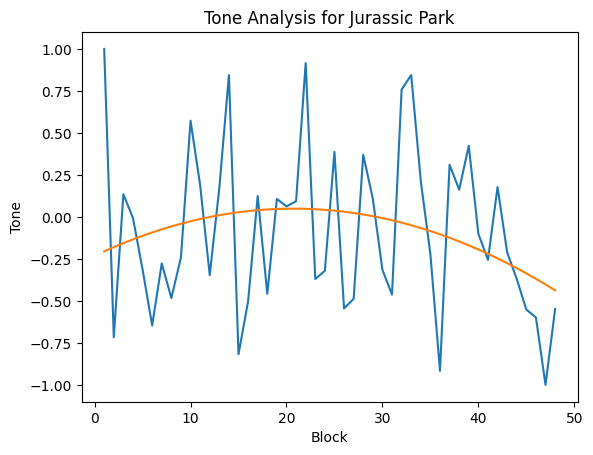

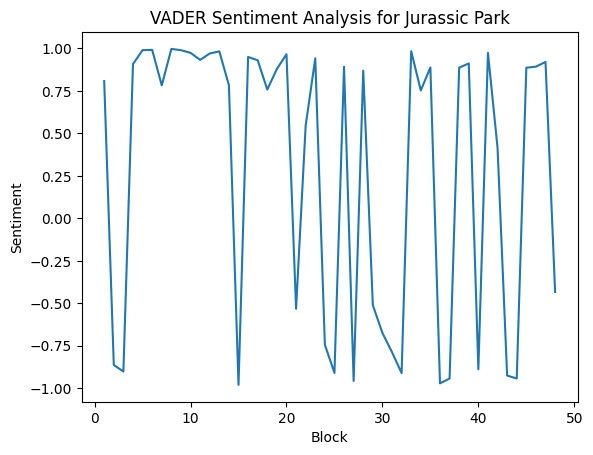

48


In [13]:
def normalize(numbers):
    max_value = max(numbers)
    min_value = min(numbers)
    normalized = []
    for num in numbers:
        normalized.append(2 * ((num - min_value) / (max_value - min_value)) - 1)
    return normalized

sentiments=normalize(sentiments)

plt.plot(blockNumber, sentiments)
plt.title("Tone Analysis for Jurassic Park")
plt.xlabel("Block")
plt.ylabel("Tone")
z = np.polyfit(blockNumber, sentiments, 2)
p = np.poly1d(z)
plt.plot(blockNumber, p(blockNumber))
plt.show()
plt.plot(blockNumber, vaderSentiments)
plt.title("VADER Sentiment Analysis for Jurassic Park")
plt.xlabel("Block")
plt.ylabel("Sentiment")
plt.show()
plt.show()
print(len(blockNumber))